# Modulo 8: Analisi Esplorativa dei Dati e Visualizzazione Grafica

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

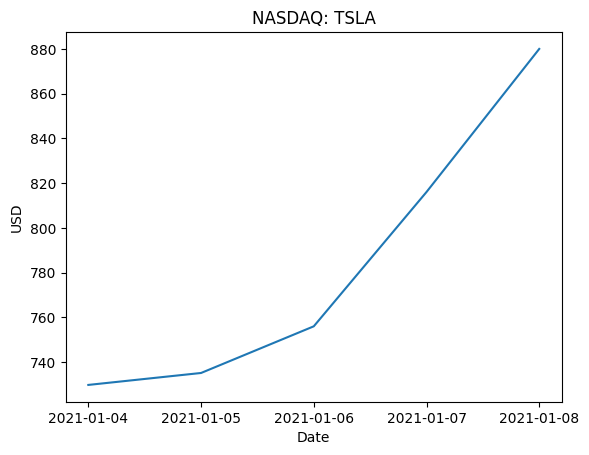

In [ ]:
days = ['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
prices = [729.77, 735.11, 755.98, 816.04, 880.02]
plt.plot(days, prices)
plt.title('NASDAQ: TSLA')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

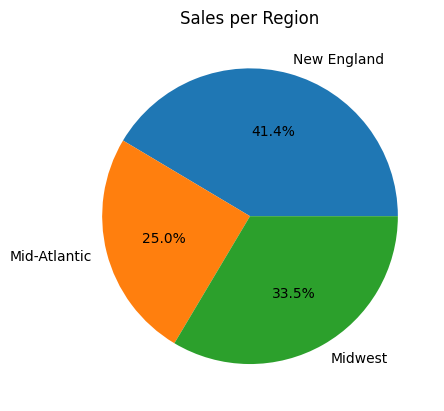

In [3]:
regions = ['New England', 'Mid-Atlantic', 'Midwest']
sales = [882703, 532648, 714406]
plt.pie(sales, labels=regions, autopct='%1.1f%%')
plt.title('Sales per Region')
plt.show()


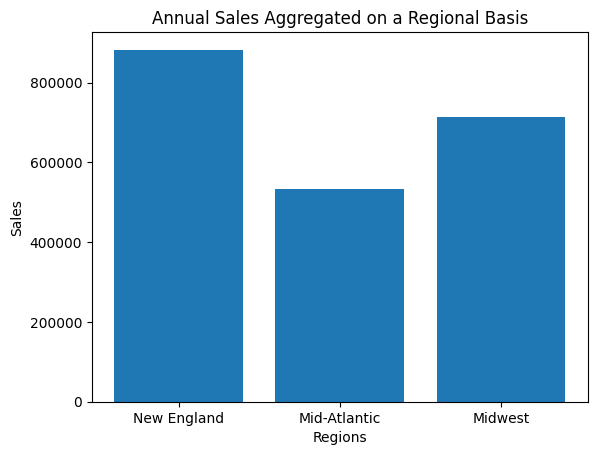

In [4]:
regions = ['New England', 'Mid-Atlantic', 'Midwest']
sales = [882703, 532648, 714406]
plt.bar(regions, sales)
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.title("Annual Sales Aggregated on a Regional Basis")
plt.show()

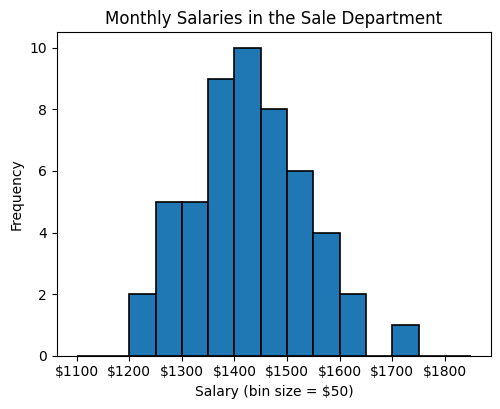

In [7]:
salaries = [1215, 1221, 1263, 1267, 1271, 1274, 1275, 1318, 1320, 1324, 1324,
            1326, 2337, 2346, 1354, 1355, 1354, 1367, 1372, 1375, 1376, 1378,
            1378, 1410, 1415, 1415, 1418, 1420, 1422, 1426, 1430, 1434, 1437,
            1451, 1454, 1467, 1470, 1473, 1477, 1479, 1480, 1514, 1516, 1522,
            1529, 1544, 1547, 1554, 1562, 1584, 1595, 1616, 1626, 1717]
fig, ax = plt.subplots()
fig.set_size_inches(5.6, 4.2)
ax.hist(salaries, bins=np.arange(1100, 1900, 50), edgecolor='black', linewidth=1.2)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(formatter)
plt.title('Monthly Salaries in the Sale Department')
plt.xlabel('Salary (bin size = $50)')
plt.ylabel('Frequency')
plt.show()

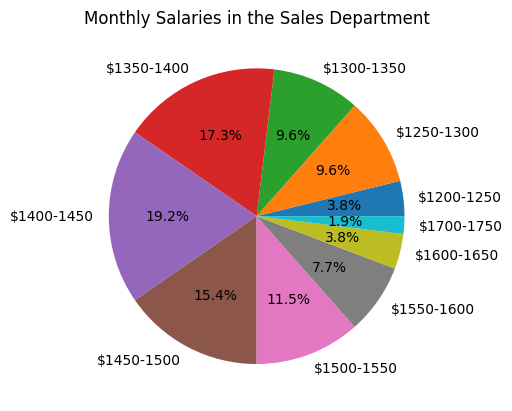

In [8]:
count, labels = np.histogram(salaries, bins=np.arange(1100, 1900, 50))
labels = ['$'+str(labels[i])+'-'+str(labels[i+1]) for i, _ in enumerate(labels[1:])]
non_zero_pos = [i for i, x in enumerate(count) if x != 0]
labels = [e for i, e in enumerate(labels) if i in non_zero_pos]
count = [e for i, e in enumerate(count) if i in non_zero_pos]
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

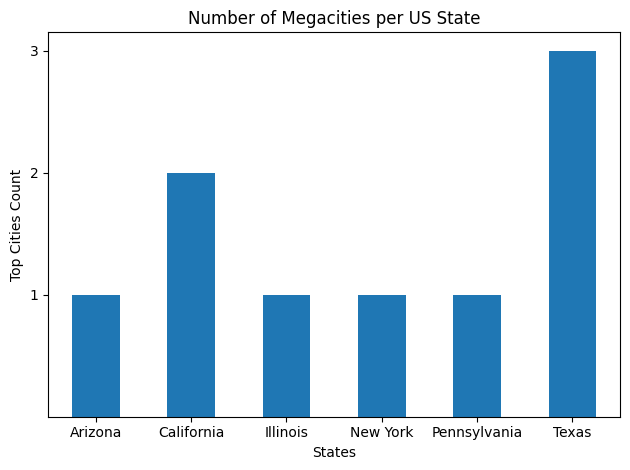

In [12]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
us_cities = pd.read_csv(url)

# Filter cities with population >= 1,000,000
top_us_cities = us_cities[us_cities['Population'] >= 1_000_000]

# Count top cities per state
top_cities_count = top_us_cities.groupby('State', as_index=False)['City'].count()
top_cities_count.rename(columns={'City': 'cities_count'}, inplace=True)

# Plotting
top_cities_count.plot.bar(x='State', y='cities_count', rot=0, legend=False)
plt.xlabel("States")
plt.ylabel("Top Cities Count")
plt.title("Number of Megacities per US State")
plt.yticks(range(top_cities_count['cities_count'].min(),
                 top_cities_count['cities_count'].max() + 1))
plt.tight_layout()
plt.show()

# Analizzare i dati di localizzazione

In [ ]:
import googlemaps
API_KEY = "..."
gmaps = googlemaps.Client(key=API_KEY)
address = '1600 Amphitheatre Parkway, Mountain View, CA'
geocode_result = gmaps.geocode(address)
print(geocode_result[0]['geometry']['location'].values())

dict_values([37.4220098, -122.0847515])


In [28]:
# trovare l'oggetto più vicino
path = "module_08/log.csv"
df = pd.read_csv(path, names=['sender', 'lat', 'long', 'tm'])
print(df)

       sender        lat      long        tm
0   Gabriele9  45.060798  7.658982  21:24:03
1   Gabriele9  45.060704  7.659026  21:24:39
2   Gabriele9  45.060701  7.659059  21:25:10
3   Gabriele9  45.060700  7.659059  21:25:41
4   Gabriele9  45.060700  7.659058  21:26:11
5   Gabriele9  45.060723  7.659062  21:26:42
6   Gabriele9  45.060723  7.659062  21:27:13
7   Gabriele9  45.060723  7.659062  21:27:40
8     mirko12  12.060798  7.658982  21:24:03
9     mirko12  12.060704  7.659026  21:24:39
10    mirko12  12.060701  7.659059  21:25:10
11    mirko12  12.060700  7.659059  21:25:41
12    mirko12  12.060700  7.659058  21:26:11
13    mirko12  12.060723  7.659062  21:26:42
14    mirko12  12.060723  7.659062  21:27:13
15    mirko12  12.060723  7.659062  21:27:40


In [29]:
latestrows = df.sort_values(['sender','tm'],ascending=False).drop_duplicates('sender')
# raggruppa il dataset in base alla colonna sender e mette prima la riga più recente
print(latestrows)
latestrows = latestrows.values.tolist()
print(latestrows)

       sender        lat      long        tm
15    mirko12  12.060723  7.659062  21:27:40
7   Gabriele9  45.060723  7.659062  21:27:40
[['mirko12', 12.060723, 7.659062, '21:27:40'], ['Gabriele9', 45.060723, 7.659062, '21:27:40']]


In [30]:
from geopy.distance import distance
pick_up = 43.578854, 39.754995
for i, row in enumerate(latestrows):
    dist = distance(pick_up, (row[1], row[2])).m # distanza in metri
    print(row[0] + ':', round(dist))
    latestrows[i].append(round(dist))

mirko12: 4655341
Gabriele9: 2548897


In [31]:
closest = min(latestrows, key=lambda x: x[4])
print('The closest cab is: ', closest[0], ' - the distance in meters: ', closest[4])

The closest cab is:  Gabriele9  - the distance in meters:  2548897


In [ ]:
from shapely.geometry import Point, Polygon

coords = [(46.082991, 38.987384), (46.075489, 38.987599), (46.079395,
            38.997684), (46.073822, 39.007297), (46.081741, 39008842)]
poly = Polygon(coords)
cab_26 = Point(46.073852, 38.991890)
cab_112 = Point(46.078228, 38.991289)
pick_up = Point(46.080074, 38991289)
print('cab26 within the polygon:', cab_26.within(poly))
print('cab112 within the polygon:', cab_112.within(poly))
print('pick_up within the polygon:', pick_up.within(poly))

cab26 within the polygon: False
cab112 within the polygon: True
pick_up within the polygon: False


### Algoritmo di prelievo

In [ ]:
from shapely.geometry import Point, Polygon
from geopy.distance import distance

coords = [(46.082991, 38.987384), (46.075489, 38.987599), (46.079395,
            38.997684), (46.073822, 39.007297), (46.081741, 39008842)]
poly = Polygon(coords)
cab_26 = Point(46.073852, 38.991890)
pick_up = Point(46.080074, 38.991289)
entry_point = Point(46.075357, 39.000298)
if cab_26.within(poly):
    dist = distance((pick_up.x, pick_up.y), (cab_26.x, cab_26.y)).m
else:
    dist = distance((cab_26.x, cab_26.y), (entry_point.x, entry_point.y)).m + distance((entry_point.x, entry_point.y), (pick_up.x, pick_up.y)).m
print(round(dist))

1544


### Derivare attributi non spaziali

In [ ]:
import pandas as pd
orders = [
    ('order_039', 'open', 'cab_14'),
    ('order_034', 'open', 'cab_79'),
    ('order_032', 'open', 'cab_104'),
    ('order_026', 'closed', 'cab_79'),
    ('order_021', 'open', 'cab_45'),
    ('order_018', 'closed', 'cab_26'),
    ('order_008', 'closed', 'cab_112'),
]
df_orders = pd.DataFrame(orders, columns=['order', 'status', 'cab'])
df_orders_open = df_orders[df_orders['status'] == 'open']
unavailable_list = df_orders_open['cab'].values.tolist()
print(unavailable_list)

['cab_14', 'cab_79', 'cab_104', 'cab_45']


In [35]:
from geopy.distance import distance
pick_up = 46.083822, 38.967845
cab_26 = 46.073852, 38.991890
cab_112 = 46.078228, 39.003949
cab_104 = 46.071226, 39.004947
cab_14 = 46.004859, 38.095825
cab_79 = 46.088621, 39.033929
cab_45 = 46.141225, 39.124934
cabs = {'cab_26': cab_26, 'cab_112': cab_112, 'cab_14': cab_14,
        'cab_104': cab_104, 'cab_79': cab_79, 'cab_45': cab_45,}
dist_list = []
for cab_name, cab_loc in cabs.items():
    if cab_name not in unavailable_list:
        dist = distance(pick_up, cab_loc).m
        dist_list.append((cab_name, round(dist)))
print(dist_list)
print(min(dist_list, key=lambda x: x[1]))

[('cab_26', 2165), ('cab_112', 2861)]
('cab_26', 2165)


### Combinare dati spaziali e non spaziali

In [ ]:
cabs_list = [
    ('cab_14',1),
    ('cab_79',0),
    ('cab_104',0),
    ('cab_45',1),
    ('cab_26',0),
    ('cab_112',1)
]
df_cabs = pd.DataFrame(cabs_list, columns =['cab', 'seat'])
df_dist = pd.DataFrame(dist_list, columns =['cab', 'dist'])
df = pd.merge(df_cabs, df_dist, on='cab', how='inner')

result_list = list(df.itertuples(index=False,name=None))
result_list = [x for x in result_list if x[1] == 1]
print(min(result_list, key=lambda x: x[2]))
# Confrontate questo risultato con quello mostrato alla fine della sezione precedente.
# Come potete vedere, la necessità di un seggiolino per bambini ci ha portato a scegliere
# un taxi diverso.

('cab_112', 1, 2861)


# Analizzare i dati delle serie temporali

In [ ]:
# serie regolari: continue nel tempo
# serie irregolari: per eventi

In [40]:
import yfinance as yf
ticker = 'TSLA'
tkr = yf.Ticker(ticker)
df = tkr.history(period='5d')
print(df)

                                 Open        High         Low       Close  \
Date                                                                        
2025-06-03 00:00:00-04:00  346.600006  355.399994  343.040009  344.269989   
2025-06-04 00:00:00-04:00  345.100006  345.600006  327.329987  332.049988   
2025-06-05 00:00:00-04:00  322.489990  324.549988  273.209991  284.700012   
2025-06-06 00:00:00-04:00  298.829987  305.500000  291.140015  295.140015   
2025-06-09 00:00:00-04:00  285.920013  309.829987  281.850006  308.579987   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-06-03 00:00:00-04:00   99324500        0.0           0.0  
2025-06-04 00:00:00-04:00   98912100        0.0           0.0  
2025-06-05 00:00:00-04:00  287499800        0.0           0.0  
2025-06-06 00:00:00-04:00  163824100        0.0           0.0  
2025-06-09 00:00:00-04:00  133815118        0.0           0.0  


In [41]:
print(df['Close'])

Date
2025-06-03 00:00:00-04:00    344.269989
2025-06-04 00:00:00-04:00    332.049988
2025-06-05 00:00:00-04:00    284.700012
2025-06-06 00:00:00-04:00    295.140015
2025-06-09 00:00:00-04:00    308.579987
Name: Close, dtype: float64


In [ ]:
# Calcolare le variazioni percentuali
print(pd.concat([df['Close'], df['Close'].shift(2)], axis=1, keys= ['Close', '2DaysShift']))

                                Close  2DaysShift
Date                                             
2025-06-03 00:00:00-04:00  344.269989         NaN
2025-06-04 00:00:00-04:00  332.049988         NaN
2025-06-05 00:00:00-04:00  284.700012  344.269989
2025-06-06 00:00:00-04:00  295.140015  332.049988
2025-06-09 00:00:00-04:00  308.579987  284.700012


In [43]:
(df['Close'] - df['Close'].shift(2))/ df['Close'].shift(2)

Date
2025-06-03 00:00:00-04:00         NaN
2025-06-04 00:00:00-04:00         NaN
2025-06-05 00:00:00-04:00   -0.173033
2025-06-06 00:00:00-04:00   -0.111158
2025-06-09 00:00:00-04:00    0.083878
Name: Close, dtype: float64

In [44]:
import numpy as np
df['2daysRise'] = np.log(df['Close'] / df['Close'].shift(2))
print(df[['Close','2daysRise']])

                                Close  2daysRise
Date                                            
2025-06-03 00:00:00-04:00  344.269989        NaN
2025-06-04 00:00:00-04:00  332.049988        NaN
2025-06-05 00:00:00-04:00  284.700012  -0.189990
2025-06-06 00:00:00-04:00  295.140015  -0.117836
2025-06-09 00:00:00-04:00  308.579987   0.080545


In [ ]:
# Calcoli a finestra mobile
df['2daysAvg'] = df['Close'].shift(1).rolling(2).mean()
print(df[['Close', '2daysAvg']])

                                Close    2daysAvg
Date                                             
2025-06-03 00:00:00-04:00  344.269989         NaN
2025-06-04 00:00:00-04:00  332.049988         NaN
2025-06-05 00:00:00-04:00  284.700012  338.159988
2025-06-06 00:00:00-04:00  295.140015  308.375000
2025-06-09 00:00:00-04:00  308.579987  289.920013


In [46]:
# Calcolare la variazione percentuale di una media mobile
df['2daysAvgRise'] = np.log(df['Close'] / df['2daysAvg'])
print(df[['Close','2daysRise','2daysAvgRise']])

                                Close  2daysRise  2daysAvgRise
Date                                                          
2025-06-03 00:00:00-04:00  344.269989        NaN           NaN
2025-06-04 00:00:00-04:00  332.049988        NaN           NaN
2025-06-05 00:00:00-04:00  284.700012  -0.189990     -0.172083
2025-06-06 00:00:00-04:00  295.140015  -0.117836     -0.043867
2025-06-09 00:00:00-04:00  308.579987   0.080545      0.062376


In [47]:
import pandas as pd
import yfinance as yf
stocks = pd.DataFrame()
tickers = ['MSFT', 'TSLA', 'GM', 'AAPL', 'ORCL', 'AMZN']
for ticker in tickers:
    tkr = yf.Ticker(ticker)
    hist = tkr.history(period='5d')
    hist = pd.DataFrame(hist[['Close']].rename(columns={'Close': ticker}))
    if stocks.empty:
        stocks = hist
    else:
        stocks = stocks.join(hist)

In [48]:
print(stocks)

                                 MSFT        TSLA         GM        AAPL  \
Date                                                                       
2025-06-03 00:00:00-04:00  462.970001  344.269989  48.904255  203.270004   
2025-06-04 00:00:00-04:00  463.869995  332.049988  47.518665  202.820007   
2025-06-05 00:00:00-04:00  467.679993  284.700012  47.099998  200.630005   
2025-06-06 00:00:00-04:00  470.380005  295.140015  47.470001  203.919998   
2025-06-09 00:00:00-04:00  472.750000  308.579987  47.930000  201.449997   

                                 ORCL        AMZN  
Date                                               
2025-06-03 00:00:00-04:00  169.139999  205.710007  
2025-06-04 00:00:00-04:00  168.100006  207.229996  
2025-06-05 00:00:00-04:00  171.139999  207.910004  
2025-06-06 00:00:00-04:00  174.020004  213.570007  
2025-06-09 00:00:00-04:00  177.149994  216.979996  


In [50]:
stocks_to_keep = []
for i in stocks.columns:
    if stocks[stocks[i]/stocks[i].shift(1)<.98].empty:
        stocks_to_keep.append(i)
print(stocks_to_keep)

['MSFT', 'AAPL', 'ORCL', 'AMZN']


In [51]:
print(stocks[stocks_to_keep])

                                 MSFT        AAPL        ORCL        AMZN
Date                                                                     
2025-06-03 00:00:00-04:00  462.970001  203.270004  169.139999  205.710007
2025-06-04 00:00:00-04:00  463.869995  202.820007  168.100006  207.229996
2025-06-05 00:00:00-04:00  467.679993  200.630005  171.139999  207.910004
2025-06-06 00:00:00-04:00  470.380005  203.919998  174.020004  213.570007
2025-06-09 00:00:00-04:00  472.750000  201.449997  177.149994  216.979996


In [55]:
# analizzare le dipendenze tra variabili
import yfinance as yf
import numpy as np

ticker = 'TSLA'
tkr = yf.Ticker(ticker)
df = tkr.history(period='1mo')
df = df[['Close','Volume']].rename(columns={'Close': 'Price'})
df['priceRise'] = np.log(df['Price'] / df['Price'].shift(1))
df['volumeRise'] = np.log(df['Volume'] / df['Volume'].shift(1))
print(df)

                                Price     Volume  priceRise  volumeRise
Date                                                                   
2025-05-12 00:00:00-04:00  318.380005  112826700        NaN         NaN
2025-05-13 00:00:00-04:00  334.070007  136992600   0.048105    0.194074
2025-05-14 00:00:00-04:00  347.679993  136997300   0.039932    0.000034
2025-05-15 00:00:00-04:00  342.820007   97882600  -0.014077   -0.336192
2025-05-16 00:00:00-04:00  349.980011   95895700   0.020670   -0.020508
2025-05-19 00:00:00-04:00  342.089996   88869900  -0.022802   -0.076088
2025-05-20 00:00:00-04:00  343.820007  131715500   0.005044    0.393471
2025-05-21 00:00:00-04:00  334.619995  102354800  -0.027123   -0.252199
2025-05-22 00:00:00-04:00  341.040009   97113400   0.019004   -0.052566
2025-05-23 00:00:00-04:00  339.339996   84654800  -0.004997   -0.137298
2025-05-27 00:00:00-04:00  362.890015  120146400   0.067097    0.350129
2025-05-28 00:00:00-04:00  356.899994   91404300  -0.016644   -0

In [ ]:
print(df[abs(df['priceRise']) > .05])

                                Price     Volume  priceRise  volumeRise
Date                                                                   
2025-05-27 00:00:00-04:00  362.890015  120146400   0.067097    0.350129
2025-06-05 00:00:00-04:00  284.700012  287499800  -0.153849    1.066991


In [ ]:
print(df['volumeRise'].mean().round(4))

0.011


In [ ]:
print(df[abs(df['priceRise']) > .05]['volumeRise'].mean().round(4))

0.7086


In [ ]:
df['volumeSum'] = df['Volume'].shift(1).rolling(2).sum().fillna(0).astype(int)

In [60]:
print(df)

                                Price     Volume  priceRise  volumeRise  \
Date                                                                      
2025-05-12 00:00:00-04:00  318.380005  112826700        NaN         NaN   
2025-05-13 00:00:00-04:00  334.070007  136992600   0.048105    0.194074   
2025-05-14 00:00:00-04:00  347.679993  136997300   0.039932    0.000034   
2025-05-15 00:00:00-04:00  342.820007   97882600  -0.014077   -0.336192   
2025-05-16 00:00:00-04:00  349.980011   95895700   0.020670   -0.020508   
2025-05-19 00:00:00-04:00  342.089996   88869900  -0.022802   -0.076088   
2025-05-20 00:00:00-04:00  343.820007  131715500   0.005044    0.393471   
2025-05-21 00:00:00-04:00  334.619995  102354800  -0.027123   -0.252199   
2025-05-22 00:00:00-04:00  341.040009   97113400   0.019004   -0.052566   
2025-05-23 00:00:00-04:00  339.339996   84654800  -0.004997   -0.137298   
2025-05-27 00:00:00-04:00  362.890015  120146400   0.067097    0.350129   
2025-05-28 00:00:00-04:00

In [ ]:
df['nextVolume'] = df['Volume'].shift(-1).fillna(0).astype(int)
print(df[abs(df['priceRise']) > .05].replace(0, np.nan).dropna())

                                Price     Volume  priceRise  volumeRise  \
Date                                                                      
2025-05-27 00:00:00-04:00  362.890015  120146400   0.067097    0.350129   
2025-06-05 00:00:00-04:00  284.700012  287499800  -0.153849    1.066991   

                           volumeSum  nextVolume  
Date                                              
2025-05-27 00:00:00-04:00  181768200    91404300  
2025-06-05 00:00:00-04:00  198236600   164747700  


# Esercizi

In [ ]:
# Esercizio: Combinare intervalli in una fetta “Other”
# Osservando il grafico della Figura 8-7, si può notare che alcuni intervalli sono rappresentati
# da una fetta molto sottile della torta. Questi sono gli intervalli con un numero di dipendenti
# pari a uno o due. Modificate il grafico in modo che questi intervalli siano uniti in un’unica
# fetta etichettata Other. A tal fine, è necessario modificare l’array count e la lista labels.
# Quindi, si deve ricreare il grafico.


# Esercizio: Disegnare una mappa con Cartopy e Matplotlib
# Ora che sapete come creare una mappa con Cartopy e Matplotlib, create una mappa che
# mostri le città di un’altra località degli Stati Uniti. Ad esempio, potreste creare una mappa
# per la California settentrionale. È necessario specificare valori diversi di latitudine e longitudine
# per gli assi y e x.

# Esercizio : Definire due o più poligoni
# Nella sezione precedente è stato utilizzato un singolo poligono che copre un’area della
# mappa. Provate ora a definire due o più poligoni che coprono aree urbane adiacenti divise
# da un ostacolo come un fiume. Ottenete le coordinate di questi poligoni utilizzando la mappa
# Google della vostra città o di qualsiasi altra area urbana del pianeta. Servono anche le
# coordinate di diversi punti all’interno di questi poligoni per simulare la posizione di alcuni
# taxi e di un punto di raccolta.
# Nello script, definite i poligoni con Shapely e raggruppateli in un dizionario, quindi raggruppate
# i punti che rappresentano i taxi in un altro dizionario. Successivamente, dividete i taxi
# in gruppi in base al poligono in cui si trovano. Questo può essere realizzato utilizzando due
# cicli: uno esterno per iterare sui poligoni e uno interno per iterare sui punti che rappresentano
# i taxi, controllando se un punto si trova all’interno di un poligono a ogni iterazione del
# ciclo interno. Il seguente frammento di codice illustra come potrebbe essere implementato:

'''
cabs_dict = {}
polygons = {'poly1': poly1, 'poly2': poly2}
cabs = {'cab_26': cab_26, 'cab_112': cab_112}
for poly_name, poly in polygons.items():
    cabs_dict[poly_name] = []
    for cab_name, cab in cabs.items():
        if cab.within(poly):
            cabs_dict[poly_name].append(cab_name)
'''
# Successivamente, dovete determinare quale poligono contiene il punto di prelievo. Una
# volta che lo conoscete, potete selezionare la lista di taxi corrispondente dal dizionario cabs_
# dict utilizzando il nome del poligono come chiave. Infine, utilizzate geopy per determinare
# quale taxi all’interno del poligono scelto è più vicino al luogo di prelievo.

# riferito a filtrare
# Esercizio : Migliorare l’algoritmo di prelievo
# Nello script appena discusso, sono stati elaborati i dati di localizzazione relativi a un singolo
# taxi per determinare la distanza tra questo taxi e il luogo di prelievo. Modificate lo script in
# modo che possa determinare le distanze tra il luogo di prelievo e ciascuno dei diversi taxi.
# È necessario raggruppare i punti che rappresentano i taxi in una lista e quindi elaborare
# questa lista in un ciclo, utilizzando l’istruzione if/else dello script precedente come corpo
# del ciclo. Quindi individuate il taxi più vicino al luogo di ritiro.

# riferito a Derivare attributi non spaziali
# Esercizio : Filtrare i dati con una comprensione di lista
# Nella sezione precedente, è stata filtrata la lista orders per ottenere solo una lista di taxi
# non disponibili, convertendo prima orders in un DataFrame. Si provi ora a generare la lista
# unavailable_list senza pandas, utilizzando invece una comprensione di lista. Con questo
# approccio, è possibile ottenere la lista dei taxi assegnati agli ordini attualmente aperti con
# una sola riga di codice:
unavailable_list = [x[2] for x in orders if x[1] == "open"]
# Dopo questa sostituzione, non sarà necessario modificare nient’altro nel resto dello script.



# ref: # analizzare le dipendenze tra variabili

# Esercizio : Aggiungere altre metriche per analizzare le dipendenze
# Continuando con il DataFrame della sezione precedente, si può notare che, sebbene sia
# probabile un collegamento tra le colonne priceRise e volumeRise, non è del tutto chiaro.
# Ad esempio, il 2022-12-16 il prezzo è sceso di circa il 5% e il volume delle vendite è aumentato
# del 10%, ma quasi lo stesso calo di prezzo del 2022-01-05 è stato accompagnato
# da un calo del 22% del volume delle vendite.

